<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ramanujan-Dictionary----with-sparse-penalty" data-toc-modified-id="Ramanujan-Dictionary----with-sparse-penalty-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ramanujan Dictionary  - with sparse penalty</a></span><ul class="toc-item"><li><span><a href="#Signal-with-3-periods-and-SNR=10" data-toc-modified-id="Signal-with-3-periods-and-SNR=10-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Signal with 3-periods and SNR=10</a></span></li><li><span><a href="#With-L1-and-sparse-penalty" data-toc-modified-id="With-L1-and-sparse-penalty-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>With L1 and sparse penalty</a></span></li><li><span><a href="#With-L1-with-no-penalty" data-toc-modified-id="With-L1-with-no-penalty-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>With L1 with no penalty</a></span></li><li><span><a href="#With-L2-and-sparse-penalty" data-toc-modified-id="With-L2-and-sparse-penalty-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>With L2 and sparse penalty</a></span></li><li><span><a href="#With-RFB" data-toc-modified-id="With-RFB-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>With RFB</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, scipy
from scipy import linalg as LA
import spkit as sp

In [2]:
sp.__version__

'0.0.9.4'

# Ramanujan Dictionary  - with sparse penalty

## Signal with 3-periods and SNR=10

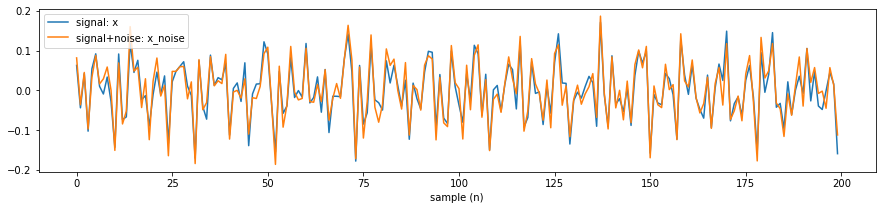

In [5]:
#np.random.seed(None)

periods    = [3,7,11]
signal_length = 200
SNR = 10

x = np.zeros(signal_length)

for period in periods:
    x_temp  = np.random.randn(period)
    x_temp  = np.tile(x_temp,int(np.ceil(signal_length/period))) 
    x_temp  = x_temp[:signal_length]
    x_temp /= LA.norm(x_temp,2)
    x += x_temp
    
x /= LA.norm(x,2)


noise  = np.random.randn(len(x))
noise /= LA.norm(noise,2)
noise_power = 10**(-1*SNR/20)
noise *= noise_power
x_noise = x + noise

plt.figure(figsize=(15,3))
plt.plot(x,label='signal: x')
plt.plot(x_noise, label='signal+noise: x_noise')
plt.xlabel('sample (n)')
plt.legend()
plt.show()

## With L1 and sparse penalty

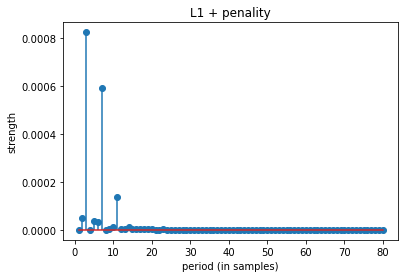

top 10 periods:  [ 3  7 11  2  5  6 14 10  9 15]


In [6]:
periodE = sp.PeriodStrength(x_noise,Pmax=80,method='Ramanujan',lambd=1, L=1, cvxsol=True)

plt.stem(np.arange(len(periodE))+1,periodE)
plt.xlabel('period (in samples)')
plt.ylabel('strength')
plt.title('L1 + penality')
plt.show()

print('top 10 periods: ',np.argsort(periodE)[::-1][:10]+1)

## With L1 with no penalty

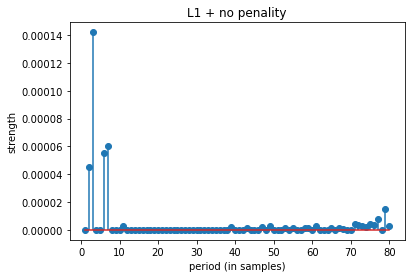

top 10 periods:  [ 3  7  6  2 79 77 75 71 72 76]


In [7]:
periodE = sp.PeriodStrength(x_noise,Pmax=80,method='Ramanujan',lambd=0, L=1, cvxsol=True)

plt.stem(np.arange(len(periodE))+1,periodE)
plt.xlabel('period (in samples)')
plt.ylabel('strength')
plt.title('L1 + no penality')
plt.show()

print('top 10 periods: ',np.argsort(periodE)[::-1][:10]+1)

## With L2 and sparse penalty

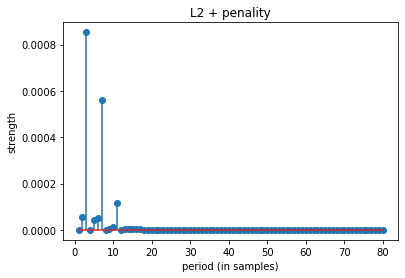

top 10 periods:  [ 3  7 11  2  6  5 10  9 14 13]


In [8]:
periodE = sp.PeriodStrength(x_noise,Pmax=80,method='Ramanujan',lambd=1, L=2, cvxsol=False)

plt.stem(np.arange(len(periodE))+1,periodE)
plt.xlabel('period (in samples)')
plt.ylabel('strength')
plt.title('L2 + penality')
plt.show()

print('top 10 periods: ',np.argsort(periodE)[::-1][:10]+1)

## With RFB

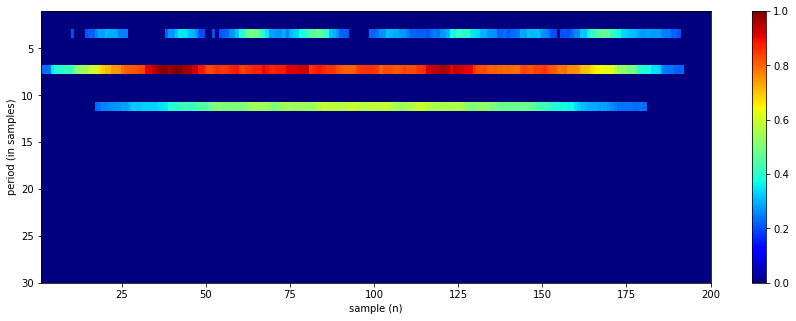

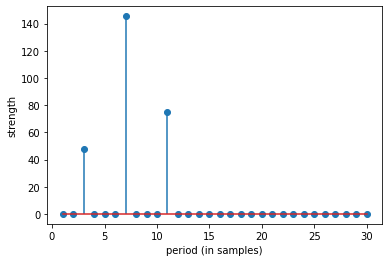

top 10 periods:  [ 7 11  3 30 29  2  4  5  6  8]


In [9]:
y,Plist = sp.RFB_prange(x=x_noise,Pmin=1,Pmax=30, Rcq=10, Rav=2, thr=0.2,return_filters=False)

plt.figure(figsize=(15,5))
im = plt.imshow(y.T,aspect='auto',cmap='jet',extent=[1,len(x_noise),30,1])
plt.colorbar(im)
plt.xlabel('sample (n)')
plt.ylabel('period (in samples)')
plt.show()

Penrgy = np.sum(y,0)

plt.stem(Plist,Penrgy)
plt.xlabel('period (in samples)')
plt.ylabel('strength')
plt.show()

print('top 10 periods: ',Plist[np.argsort(Penrgy)[::-1]][:10])